Setting up our darknet by clonning from https://github.com/AlexeyAB/darknet

In the makefile, only the first four parameters are important for the moment. Updating the value from 0 to 1 will enable the build to use CUDA on GPU ( massive parellel processing), cuDNN, OpenCV (Open Computer Vision library) and tensorcores. After which building commenced

In [1]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet



Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 12.07 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.
/content/darknet


In [2]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !!! In case you dont have a GPU, make sure to comment out the below 3 lines !!! #
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

The darknet framework has been built successfully.We need to download pretrained weights for the COCO data set. Again, from Alexey's GitHub.

In [3]:
!wget --quiet https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [4]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

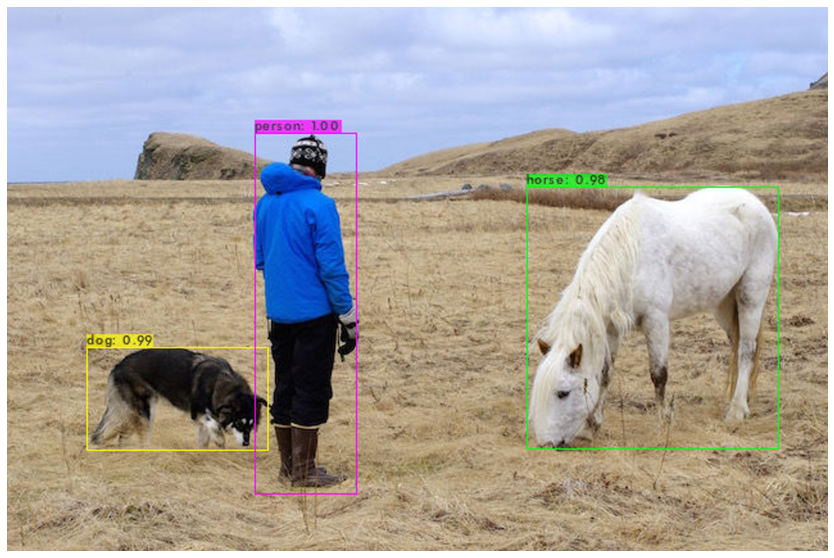

In [5]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -dont-show


# Show the result using the helper imgShow()
imShow('predictions.jpg')


In [6]:
%%writefile data/obj.names
person
car
bus


Writing data/obj.names


In [7]:
#!git clone https://github.com/pjreddie/darknet
#%cd darknet
#!make
#!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

In [8]:
#!wget https://pjreddie.com/media/files/yolov3.weights

In [9]:
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

Uploading image folder and manipulating the directory to ensure the images are in the right folder

In [10]:
#cd myfiles/
#/content/drive/MyDrive/yolo22_annot
#%cd drive/
!ln -s '/content/drive/MyDrive' yolo22annot

In [22]:
cd yolo22annot/

/content/drive/MyDrive


In [23]:
!ls -ltr

total 38297
-rw------- 1 root root 1560010 Jun  8  2018 'Getting started.pdf'
-rw------- 1 root root 2277177 Jun  5  2020  15913314959908149854603151008121.jpg
-rw------- 1 root root 2275058 Jun  5  2020  15913315894655595079461965808699.jpg
-rw------- 1 root root 2481540 Jun  5  2020  15913316537407954694902860071296.jpg
-rw------- 1 root root 2251883 Jun  5  2020  15913317217627071537669441759831.jpg
-rw------- 1 root root 1812645 Jun  5  2020  15913318147241590006750872265396.jpg
-rw------- 1 root root 2228079 Jun  5  2020  15913321242572943670014049044224.jpg
-rw------- 1 root root 1933257 Jun  5  2020  15913325234635080928369261213478.jpg
-rw------- 1 root root 2294535 Jun  5  2020  15913326049795779522359038273838.jpg
-rw------- 1 root root 2643531 Jun  6  2020  15914616553646318246090293665204.jpg
-rw------- 1 root root 2495926 Jun  6  2020  15914617865936465349391422320765.jpg
-rw------- 1 root root 1514520 Jun  6  2020  15914619306428900538617771056438.jpg
-rw------- 1 root ro

In [24]:
cd yolo22annot/

/content/drive/MyDrive/yolo22annot


In [25]:
cd obj_train_data/

/content/drive/MyDrive/yolo22annot/obj_train_data


In [26]:
!ls -ltr

total 67951
-rw------- 1 root root    190 Jan 23 21:47 000000106513.txt
-rw------- 1 root root 192956 Jan 23 21:47 000000115864.jpg
-rw------- 1 root root    304 Jan 23 21:47 000000100978.txt
-rw------- 1 root root 233678 Jan 23 21:47 000000055641.jpg
-rw------- 1 root root   2242 Jan 23 21:47 000000112377.txt
-rw------- 1 root root    494 Jan 23 21:47 000000069944.txt
-rw------- 1 root root 184851 Jan 23 21:47 000000056699.jpg
-rw------- 1 root root 158753 Jan 23 21:47 000000015289.jpg
-rw------- 1 root root     38 Jan 23 21:47 000000120907.txt
-rw------- 1 root root 152731 Jan 23 21:47 000000109939.jpg
-rw------- 1 root root    532 Jan 23 21:47 000000101053.txt
-rw------- 1 root root    152 Jan 23 21:47 000000094420.txt
-rw------- 1 root root 160664 Jan 23 21:47 000000094097.jpg
-rw------- 1 root root    114 Jan 23 21:47 000000073413.txt
-rw------- 1 root root 239387 Jan 23 21:47 000000067178.jpg
-rw------- 1 root root    152 Jan 23 21:47 000000056187.txt
-rw------- 1 root root 23245

In [27]:
!mkdir /content/darknet/data/testimages/

mkdir: cannot create directory ‘/content/darknet/data/testimages/’: File exists


In [28]:
!cp *.jpg /content/darknet/data/testimages/

In [29]:
!ls -ltr  /content/darknet/data/testimages/


total 101104
-rw------- 1 root root 2277177 Feb  5 21:27 15913314959908149854603151008121.jpg
-rw------- 1 root root 2275058 Feb  5 21:27 15913315894655595079461965808699.jpg
-rw------- 1 root root 2481540 Feb  5 21:27 15913316537407954694902860071296.jpg
-rw------- 1 root root 2251883 Feb  5 21:27 15913317217627071537669441759831.jpg
-rw------- 1 root root 1812645 Feb  5 21:27 15913318147241590006750872265396.jpg
-rw------- 1 root root 2228079 Feb  5 21:27 15913321242572943670014049044224.jpg
-rw------- 1 root root 1933257 Feb  5 21:27 15913325234635080928369261213478.jpg
-rw------- 1 root root 2294535 Feb  5 21:27 15913326049795779522359038273838.jpg
-rw------- 1 root root 2643531 Feb  5 21:27 15914616553646318246090293665204.jpg
-rw------- 1 root root 2495926 Feb  5 21:28 15914617865936465349391422320765.jpg
-rw------- 1 root root 1514520 Feb  5 21:28 15914619306428900538617771056438.jpg
-rw------- 1 root root 1890991 Feb  5 21:28 15914620062332082704715470702363.jpg
-rw------- 1 ro

In [30]:
cd /content/darknet/

/content/darknet


The follow lines of code will iterate through each file, run the detector on it

In [31]:
#%%capture
import os,sys
directory = '/content/darknet/data/testimages/'
for filename in os.listdir(directory):
    cmd =  "./darknet detector test cfg/coco.data cfg/yolov4.cfg /content/darknet/yolov4.weights /content/darknet/data/testimages/" + filename + " -dont_show"
    try:
      !{cmd}
    except:
      print("failed")
    cmd = "cp 'predictions.jpg' './yolo22annot/obj_train_data/results/" + filename + "_results.jpg' "
    !{cmd}

Streaming output truncated to the last 5000 lines.
  74 conv    256       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 256 0.189 BF
  75 conv    256       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 256 1.703 BF
  76 Shortcut Layer: 73,  wt = 0, wn = 0, outputs:  38 x  38 x 256 0.000 BF
  77 conv    256       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 256 0.189 BF
  78 conv    256       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 256 1.703 BF
  79 Shortcut Layer: 76,  wt = 0, wn = 0, outputs:  38 x  38 x 256 0.000 BF
  80 conv    256       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 256 0.189 BF
  81 conv    256       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 256 1.703 BF
  82 Shortcut Layer: 79,  wt = 0, wn = 0, outputs:  38 x  38 x 256 0.000 BF
  83 conv    256       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 256 0.189 BF
  84 route  83 56 	                           ->   38 x  38 x 512 
  85 conv    512       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 512 0.757 BF
  86 conv   10

In [32]:
#!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/000000120412.jpg

Checking-out the prediction[Evaluating each image]


After running the yolo detector on it,it output the image with percentage values for each class which is the confidence with which the system thinks the object belongs to that class 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

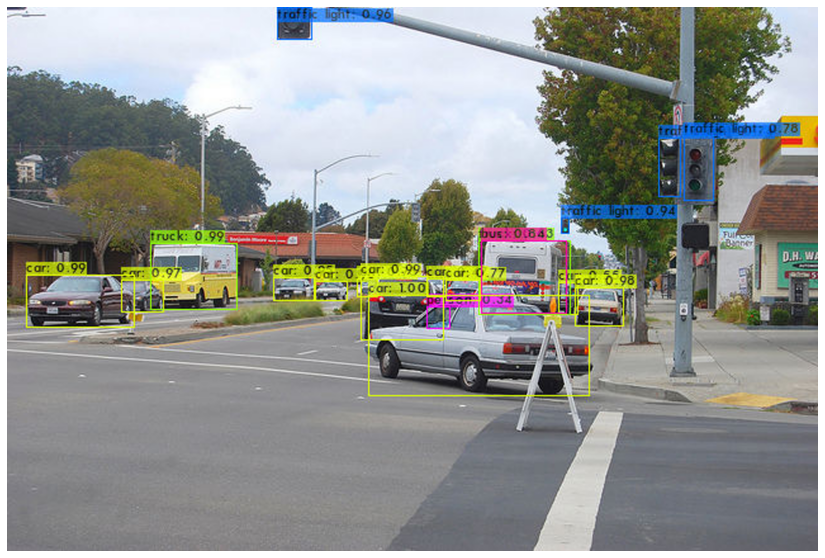

In [34]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /content/darknet/data/testimages//000000120412.jpg -dont-show
#./darknet detector test cfg/coco.data cfg/yolov4.cfg /content/darknet/yolov4.weights /content/darknet/data/testimages/


# Show the result using the helper imgShow()
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

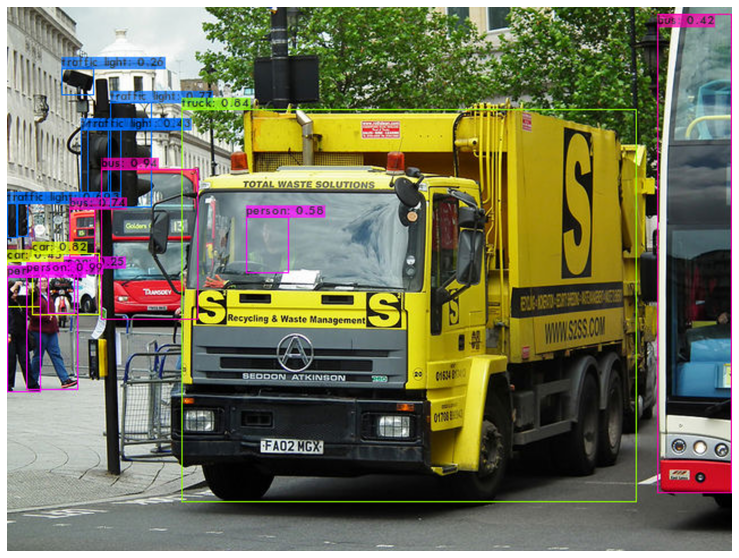

In [35]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /content/darknet/data/testimages//000000012726.jpg -dont-show



# Show the result using the helper imgShow()
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

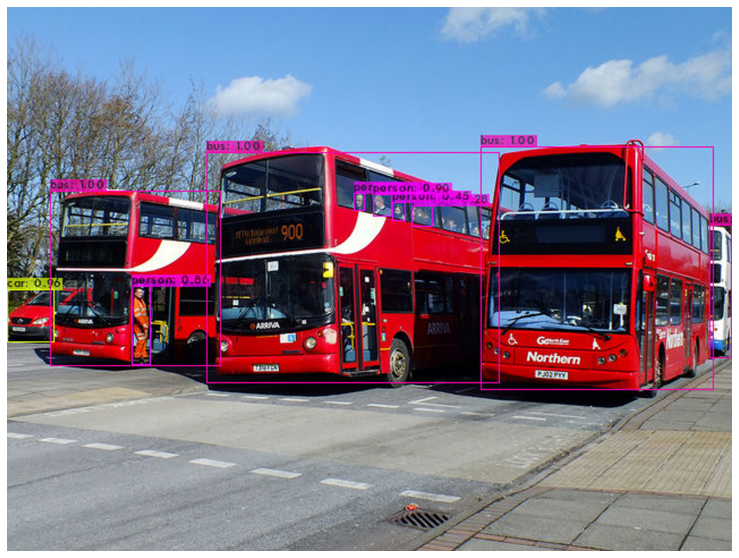

In [36]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /content/darknet/data/testimages//000000057088.jpg -dont-show



# Show the result using the helper imgShow()
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

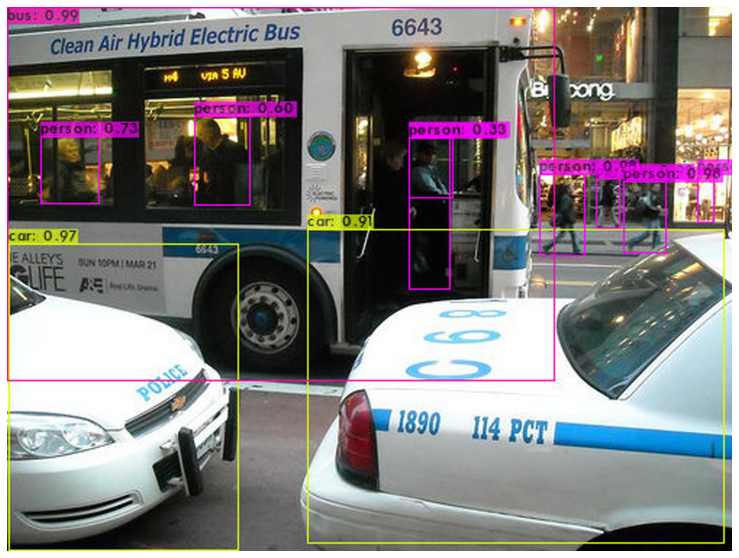

In [37]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /content/darknet/data/testimages//000000056615.jpg -dont-show



# Show the result using the helper imgShow()
imShow('predictions.jpg')